**Where do I get the idea from?**

I read an article as of Jun 3rd, 2018 regarding the hard time Emerging Market are facing recently, due to the US dollar surging. Their central banks are forced to raise interest rate, which has been stalled for quite a long time. A strong Dollar also pushs down the value of their currencies. 


**Dollar’s Strength Adds Stress to Emerging Market Currencies**

*Source: https://www.wsj.com/articles/dollars-strength-adds-stress-to-emerging-market-currencies-1528027200*
    


#### Load packages and batch

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import seaborn as sns
import fix_yahoo_finance
fix_yahoo_finance.pdr_override()

The MSCI Emerging Markets Index, which measures EM stock performance, rose 37.3% in 2017. Yet, it slid 10.25% to Jun 3rd from its peak at Jan 22rd. Below, the price movement of its iShare ETF ,which shows a
similar trend as the MSCI EM index.

[*********************100%***********************]  1 of 1 downloaded


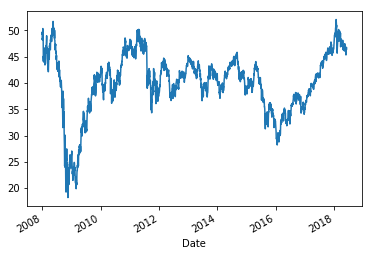

In [3]:
eem = pdr.get_data_yahoo('EEM', '2008-01-01', '2018-12-31').Close
eem.plot()

#### Figure out the bottom around 2016

In [4]:
eem['2015':'2016'].idxmin()

Timestamp('2016-01-20 00:00:00')

#### Expand the date range starting from 2016 
As can see below, the ETF price surged 70% from the start of 2016 to Feb 2018.

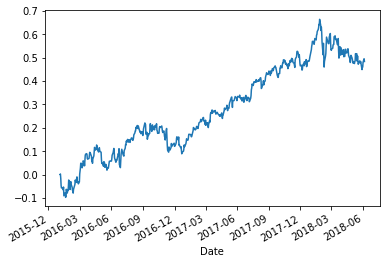

In [5]:
eem2 = eem['2016':]

# the lambda function below is to transfer the absolute price to the relative  based on the first price.
relativeprc = lambda d: d.divide(d[:1].iloc[0]) - 1

ax = relativeprc(eem2).plot()

#### Correlation Analysis on 5 currency pairs

In [6]:
ccylist = ['ARS', 'TRY', 'BRL', 'ZAR', 'IDR']
# The ccy mentioned in the WSJ artifle: Argentina, Turkey, Brazil, South Africa, Indonesia
quotedas = 'USD'

ticklist = [ccy + quotedas + '=X' for ccy in ccylist]
RW = pdr.get_data_yahoo(ticklist, '2006-01-01', '2018-12-31').Close
RW.columns = [tick[:3] for tick in RW.columns]

[*********************100%***********************]  5 of 5 downloaded


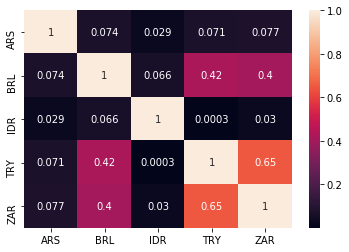

In [7]:
# Transfer the price to return
rtn = RW.pct_change()
rtn.iloc[0] = 0
rtnlog = np.log(rtn + 1)

# Plot the correlation matrix as a heatmap
retcorrmat = rtnlog.corr()
sns.heatmap(retcorrmat, annot=True)

The heatmap above tells that correlation of return between those currencies are not really significant. Correl between Turkey iira and South African rand is the highest = 0.65. Let's take a deep look into its 3m rolling correl below.

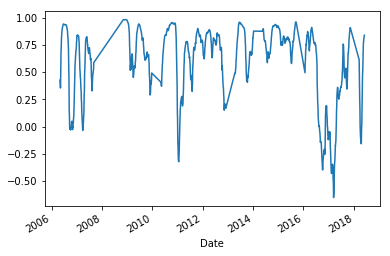

In [14]:
corr_TurZar = RW.TRY.rolling(30*3).corr(RW.ZAR)
corr_TurZar.dropna(inplace = True)
corr_TurZar.plot()

Although the correlation during 2006 to 2018 is 0.65, the 3m rolling number swing a lot. The correl of return cannot really give us more information. 

Let's focus on the correl on relative price.

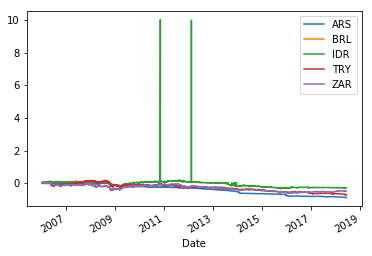

In [29]:
# make a copy of the raw data
scaledRW = RW.copy()
relativeprc(scaledRW).plot()

There are two weired outliers during 2010 - 2012 for Indonesia rupiah, will have to be excluded.

In [30]:
scaledRW.loc['2010':'2011', 'IDR'].idxmax()  # the fist outlier occurs at 2010-11-01

Timestamp('2010-11-01 00:00:00')

In [31]:
loc = scaledRW.index.get_loc('2010-11-01')
scaledRW.IDR.iloc[loc] / scaledRW.IDR.iloc[loc - 1]

10.053571428571427

The IDRUSD exchange rate surged 10x on 2010-11-01 for some reason.

#### Exclude the column with outliers and handle the missing data


In [32]:
scaledRW.drop('IDR', axis='columns', inplace=True)
scaledRW.fillna(method='ffill', inplace = True)
scaledRW.dropna(inplace = True)

#### Visulize their price movement and correl heatmap

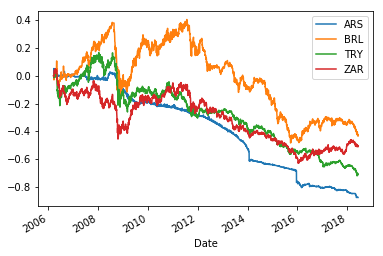

In [34]:
cleanRW = relativeprc(scaledRW)
cleanRW.plot()

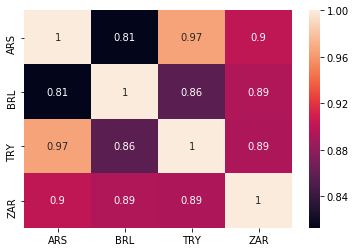

In [35]:
sns.heatmap(cleanRW.corr(), annot=True)

The relative price movement shows very strong correl between each currency pair.

Below, 2018 only

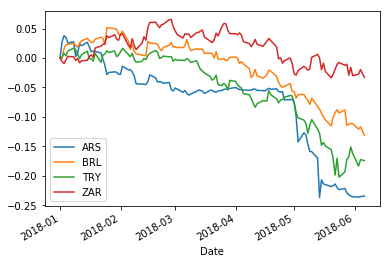

In [37]:
cleanRW18 = relativeprc(scaledRW['2018'])
cleanRW18.plot()

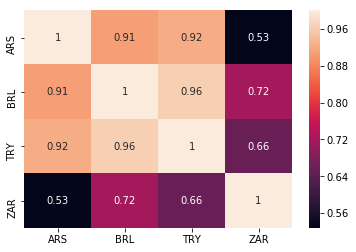

In [38]:
sns.heatmap(cleanRW18.corr(), annot=True)